In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
add_data_updated = {
    "Size":           [100,   200,    300,    400,    500,     600,     700,     800,     900,     1000],
    "OurMatrix(mcs)": [68.7,  145.4,  320.7,  659.3,  933.3,   1201.4,  1756.6,  2255.1,  3156.8,  4187.0],
    "Eigen(mcs)":      [2.4,   10.1,   23.8,   67.0,   113.5,   154.0,   222.3,   308.8,   420.5,   728.9]
}


mult_data_updated = {
    "Size": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "OurMatrix(mcs)": [439.7, 2131, 5965.6, 13301.1, 28621, 44383.9, 66959.7, 98384.1, 144042, 224453],
    "Eigen(mcs)":   [117.4, 789.3, 2923.9, 6532.5, 11578.9, 20099, 31928.6, 45798, 66096.7, 89033.6]
}


In [21]:
df_add_updated = pd.DataFrame(add_data_updated)
df_mult_updated = pd.DataFrame(mult_data_updated)

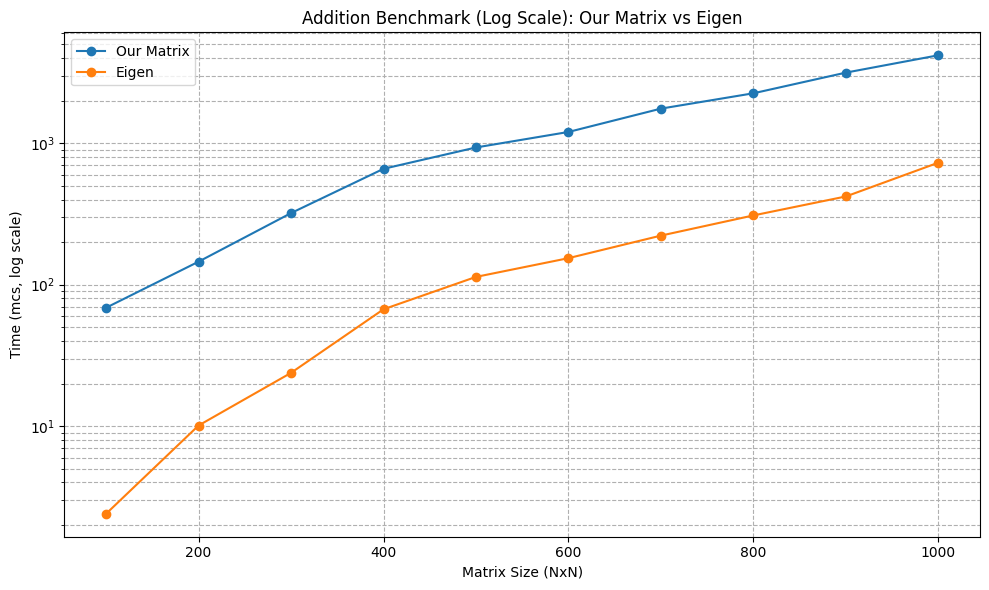

In [22]:
# Plot  Addition (log scale)
plt.figure(figsize=(10, 6))
plt.plot(df_add_updated["Size"], df_add_updated["OurMatrix(mcs)"], label="Our Matrix", marker='o')
plt.plot(df_add_updated["Size"], df_add_updated["Eigen(mcs)"], label="Eigen", marker='o')
plt.title("Addition Benchmark (Log Scale): Our Matrix vs Eigen")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Time (mcs, log scale)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

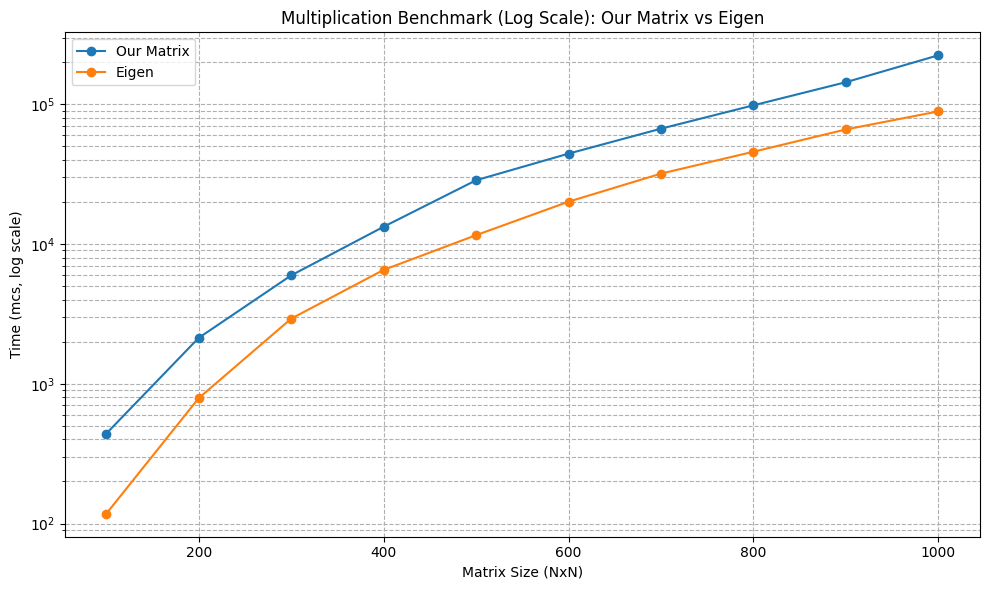

In [16]:
# Plot  Multiplication (log scale)
plt.figure(figsize=(10, 6))
plt.plot(df_mult_updated["Size"], df_mult_updated["OurMatrix(mcs)"], label="Our Matrix", marker='o')
plt.plot(df_mult_updated["Size"], df_mult_updated["Eigen(mcs)"], label="Eigen", marker='o')
plt.title("Multiplication Benchmark (Log Scale): Our Matrix vs Eigen")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Time (mcs, log scale)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

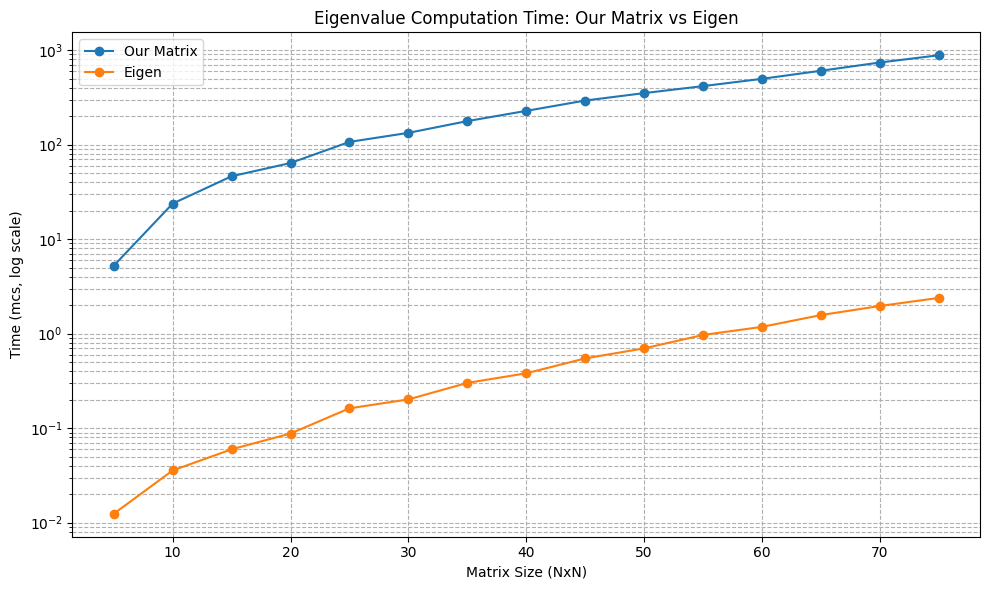

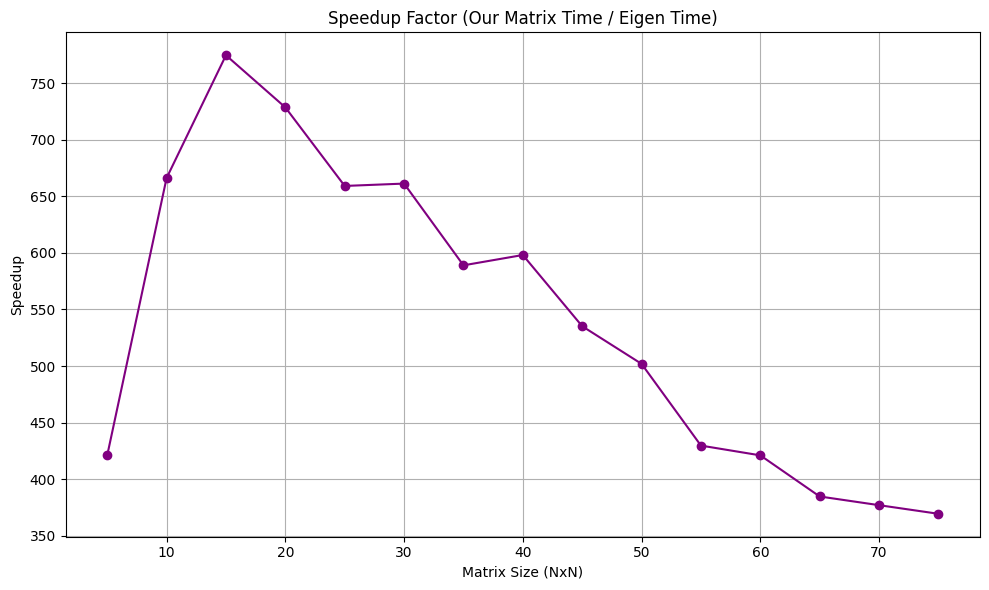

In [23]:

data = {
    "Size":           [5,    10,     15,     20,     25,      30,      35,      40,      45,      50,       55,       60,        65,       70,        75],
    "OurMatrix(ms)": [5.22906, 23.7783, 46.2884, 63.9231, 106.933, 133.278, 177.44,  227.736, 292.904, 350.982,  416.248,  496.985,  605.174,  739.909,  882.747],
    "Eigen(ms)":      [0.012419, 0.0356956, 0.0597545, 0.0877354, 0.162226, 0.201556, 0.30125, 0.380742, 0.547271, 0.699251, 0.968629, 1.18022, 1.57288, 1.96223, 2.38932]
}


df = pd.DataFrame(data)

# Plot execution times (log scale)
plt.figure(figsize=(10, 6))
plt.plot(df["Size"], df["OurMatrix(ms)"], label="Our Matrix", marker='o')
plt.plot(df["Size"], df["Eigen(ms)"], label="Eigen", marker='o')
plt.title("Eigenvalue Computation Time: Our Matrix vs Eigen")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Time (mcs, log scale)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()

# Plot speedup (YourTime / EigenTime)
df["Speedup (Our/Eigen)"] = df["OurMatrix(ms)"] / df["Eigen(ms)"]

plt.figure(figsize=(10, 6))
plt.plot(df["Size"], df["Speedup (Our/Eigen)"], marker='o', color='purple')
plt.title("Speedup Factor (Our Matrix Time / Eigen Time)")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Speedup")
plt.grid(True)
plt.tight_layout()
plt.show()
